In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Para la Visualizacion 
# -----------------------------------------------------------------------
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Para los modelos
# -----------------------------------------------------------------------
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Importar métricas de evaluación directamente
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Para la codificación de las variables categóricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder 
from category_encoders import TargetEncoder  

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

import pickle
import os
import sys 

import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath("../../../src"))   
import soporte_preprocesamiento as b

pd.set_option("display.max_columns", None)

# **VIVIENDAS MEDIANAS**

In [2]:
df_sin_outmedianas= pd.read_pickle("../../../datos/EF/Datos_modelos/medianas_sin_outliers.pkl")

In [3]:
df_sin_outmedianas.head()

,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,Municipio_pequeño,De 50.000 habitantes o menos,63.480315,Junio,2021,Si,No,1,Propia por compra con pagos pendientes,De 200€ a menos de 300€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,Si,Si,Si,1,1,3,0,0,Entre 76 y 90 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio con 10 o más viviendas,3,1,De 1991 a 2000,moderadamente bueno,No es accesible,No,Si,De 101 a 150,No,No,Si,Alcantarillado,4,convencional,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2,0
1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,73.385525,Diciembre,2021,Si,No,1,Propia por herencia o donación,Desconocido,individual,Electricidad,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,1,2,3,0,0,Entre 61 y 75 m2,1,Si,Si,No,Si,Si,Si,No,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,Si,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.000€ a menos de 2.500€,Multifamiliar,Edificio de 3 a 9 viviendas,3,0,De 1951 a 1960,bueno,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,0
2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,53.848172,Diciembre,2021,Si,No,1,Propia por compra totalmente pagada,Desconocido,individual,Gas natural,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,1,2,2,0,0,Entre 46 y 60 m2,1,Si,Si,Si,Si,Si,Si,No,No dispone de servicio doméstico,"ayudas de familiares, parientes, amigos, vecinos",No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.000€ a menos de 1.500€,Multifamiliar,Edificio de 3 a 9 viviendas,3,1,De 1981 a 1990,muy bueno,Es accesible,Si,Si,De 11 a 20,Si,No,Si,Alcantarillado,2,convencional,no tiene renovable,banda ancha movil,País Vasco,6200,IBI,2147,4.2,0
3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,82.763084,Junio,2021,Si,Si,4,Propia por compra con pagos pendientes,De 400€ a menos de 500€,individual,Gas natural,abastecimiento público,Si,Si,No,Si,Si,Si,Si,Si,Si,Si,Si,Si,2,1,3,1,0,Entre 61 y 75 m2,2,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.500€ a menos de 3.000€,Multifamiliar,Edificio de 3 a 9 viviendas,2,0,De 2001 a 2010,levemente mejorable,Es accesible,Si,Si,1,Si,No,Si,Alcantarillado,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,0
4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,56.553506,Julio,2021,Si,No,1,Propia por compra totalmente pagada,Desconocido,individual,Gas natural,abastecimiento público,Si,Si,No,No,Si,Si,Si,No,No,No,Si,Si,1

### Filtramos las columnas máximas con las que vamos a poder crear un modelo que nos valga teniendo en cuenta los datos de los que disponemos (los de Red Piso)

Aquí debido a lo que había visto en las correlaciones elimino horas de sol, garaje y tipoedif

In [5]:
df_sin_outmedianas_fil=df_sin_outmedianas[['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa',
       'bonificaciones', 'radiacion_solar', 'erfotov']]

In [6]:
df_sin_outmedianas_fil.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,Álava,No tiene calefacción,1,3,Entre 76 y 90 m2,De 1991 a 2000,moderadamente bueno,No es accesible,No,De 101 a 150,No,País Vasco,6200,IBI,4.2,0
1,Álava,individual,1,3,Entre 61 y 75 m2,De 1951 a 1960,bueno,No es accesible,No,No tiene garaje,No,País Vasco,6200,IBI,4.2,0


In [7]:
columnas_categoricas_med=df_sin_outmedianas_fil.select_dtypes(include=['object', 'category']).columns

In [8]:
columnas_categoricas_med

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'annoedifinterv',
       'estadoedif', 'accesoedif', 'ascensor', 'nplazasgar', 'aguacalcent',
       'ccaa', 'bonificaciones'],
      dtype='object')

**AHORA HACIENDO EL ENCODING Y TRATANDO EL DESBALANCEO**

In [9]:
b.detectar_orden_cat(df_sin_outmedianas_fil, columnas_categoricas_med,"erfotov")

Estamos evaluando el orden de la variable IDQ_PV


erfotov,0,1
idq_pv,,
A Coruña,1604,9
Albacete,611,3
Alicante,2953,20
Almería,1166,3
Asturias,2884,20
Badajoz,1213,5
Baleares,1678,28
Barcelona,8950,87
Burgos,781,5


La variable idq_pv SI tiene orden porque su p-valor es : 1.1880979177318409e-26
Estamos evaluando el orden de la variable CALEFAC


erfotov,0,1
calefac,,
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),17121,103
No tiene calefacción,19633,129
colectiva,7870,143
individual,40830,387


La variable calefac SI tiene orden porque su p-valor es : 2.4217109000222297e-22
Estamos evaluando el orden de la variable NASEOS


erfotov,0,1
naseos,,
0,55,1
1,51215,334
2,33517,416
3,618,10
4,49,1


La variable naseos SI tiene orden porque su p-valor es : 4.2006670960144067e-17
Estamos evaluando el orden de la variable NDORMITO


erfotov,0,1
ndormito,,
0,396,6
1,3431,55
2,25721,266
3,49611,389
4,6060,41
5,206,4
6,29,1


La variable ndormito SI tiene orden porque su p-valor es : 3.278357989740644e-07
Estamos evaluando el orden de la variable METROSVI


erfotov,0,1
metrosvi,,
Entre 46 y 60 m2,13006,128
Entre 61 y 75 m2,28058,217
Entre 76 y 90 m2,44390,417


La variable metrosvi SI tiene orden porque su p-valor es : 0.034616691685634
Estamos evaluando el orden de la variable ANNOEDIFINTERV


erfotov,0,1
annoedifinterv,,
Anterior a 1900,2156,19
De 1900 a 1920,1559,10
De 1921 a 1940,2013,15
De 1941 a 1950,2379,17
De 1951 a 1960,5823,32
De 1961 a 1970,12670,53
De 1971 a 1980,16726,75
De 1981 a 1990,11098,66
De 1991 a 2000,13665,89


La variable annoedifinterv SI tiene orden porque su p-valor es : 3.515351707764224e-167
Estamos evaluando el orden de la variable ESTADOEDIF


erfotov,0,1
estadoedif,,
bueno,19350,131
casi inhabitable,158,1
casi perfecto,11545,154
inhabitable,291,2
levemente mejorable,6886,37
mejorable,852,5
moderadamente bueno,9677,61
moderadamente mejorable,1771,10
muy bueno,26342,224


La variable estadoedif SI tiene orden porque su p-valor es : 1.4419476829778324e-17
Estamos evaluando el orden de la variable ACCESOEDIF


erfotov,0,1
accesoedif,,
Es accesible,55782,620
No es accesible,29672,142


La variable accesoedif SI tiene orden porque su p-valor es : 2.0981626698838362e-20
Estamos evaluando el orden de la variable ASCENSOR


erfotov,0,1
ascensor,,
No,36202,246
Si,49252,516


La variable ascensor SI tiene orden porque su p-valor es : 2.5275703244255525e-08
Estamos evaluando el orden de la variable NPLAZASGAR


erfotov,0,1
nplazasgar,,
1,5128,52
2,2086,39
De 101 a 150,2724,57
De 11 a 20,6125,49
De 21 a 50,9497,104
De 3 a 5,1775,20
De 51 a 100,6491,96
De 6 a 10,3234,21
Más de 150,3000,87


La variable nplazasgar SI tiene orden porque su p-valor es : 2.764592564816921e-59
Estamos evaluando el orden de la variable AGUACALCENT


erfotov,0,1
aguacalcent,,
No,63822,370
Si,21632,392


La variable aguacalcent SI tiene orden porque su p-valor es : 1.2900980860665134e-60
Estamos evaluando el orden de la variable CCAA


erfotov,0,1
ccaa,,
Andalucía,12830,63
Aragón,3104,54
Asturias,2884,20
Cantabria,2238,7
Castilla y León,6987,55
Castilla-La Mancha,3514,26
Cataluña,11312,112
Ceuta,952,5
Comunidad Valenciana,6498,40


La variable ccaa SI tiene orden porque su p-valor es : 2.511085547764777e-21
Estamos evaluando el orden de la variable BONIFICACIONES


erfotov,0,1
bonificaciones,,
IBI,39316,383
IBI y ICIO,44262,370
Ninguna,1876,9


La variable bonificaciones SI tiene orden porque su p-valor es : 0.01783442848617836


#### CONCLUSIONES SOBRE EL ORDEN EN LAS MEDIANAS:  

**ORDENADAS:**  
- calefac 
- naseos  
- metrosvi  
- tipoedif  
- annoedifinterv  
- ascensor  
- aguacalcent  
- ccaa  
- idq_pv  
- ndormito  
- estadoedif   
- accesoedif  
- garaje  
- nplazasgar
- bonificaciones 
  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*  
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



OPTO POR UN FREQUENCY

In [10]:
diccionario_encoding_med = {"onehot": [], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ["calefac", "naseos", "metrosvi", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "nplazasgar", "bonificaciones"],
                        "target": ["calefac", "naseos", "metrosvi", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "nplazasgar", "bonificaciones"]  
                        }

In [11]:
encoding_med=b.Encoding(df_sin_outmedianas_fil, diccionario_encoding_med, "erfotov")
encoded_med, frecuencia_med_dicc=encoding_med.frequency_encoding()

In [12]:
with open('../../../transformers/preprocesamiento/medianas/frecuencia_med_dicc.pkl', 'wb') as t:
    pickle.dump(frecuencia_med_dicc, t)

In [13]:
encoded_med.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.159530,0.112949,0.345806,0.422752,0.032256,0.744549,0.058342,6200,0.46046,4.2,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.067911,0.225956,0.345806,0.422752,0.529264,0.744549,0.058342,6200,0.46046,4.2,0
2,0.012886,0.478067,0.597905,0.301417,0.152338,0.129489,0.308133,0.654194,0.577248,0.071611,0.744549,0.058342,6200,0.46046,4.2,0
3,0.012886,0.478067,0.393581,0.579939,0.327955,0.178528,0.080298,0.654194,0.577248,0.060082,0.744549,0.058342,6200,0.46046,4.2,0
4,0.012886,0.478067,0.597905,0.301417,0.327955,0.147571,0.112949,0.654194,0.577248,0.529264,0.744549,0.058342,6200,0.46046,4.2,0


**AHORA HACIENDO LA ESTANDARIZACIÓN**

In [14]:
scaler=MinMaxScaler()
nums_med=encoded_med.select_dtypes(include=np.number)
nums_med.drop(columns="erfotov", inplace=True)
nums_med.drop(columns=columnas_categoricas_med, inplace=True)
cols_num_med=nums_med.columns
dfa_med=scaler.fit_transform(nums_med)
df_med=pd.DataFrame(dfa_med, columns=cols_num_med)
encoded_med[cols_num_med]= df_med

In [15]:
with open('../../../transformers/preprocesamiento/medianas/Minmax_scaler.pkl', 'wb') as t:
    pickle.dump(scaler, t)

In [16]:
encoded_med.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.159530,0.112949,0.345806,0.422752,0.032256,0.744549,0.058342,0.533333,0.46046,0.247934,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.067911,0.225956,0.345806,0.422752,0.529264,0.744549,0.058342,0.533333,0.46046,0.247934,0
2,0.012886,0.478067,0.597905,0.301417,0.152338,0.129489,0.308133,0.654194,0.577248,0.071611,0.744549,0.058342,0.533333,0.46046,0.247934,0
3,0.012886,0.478067,0.393581,0.579939,0.327955,0.178528,0.080298,0.654194,0.577248,0.060082,0.744549,0.058342,0.533333,0.46046,0.247934,0
4,0.012886,0.478067,0.597905,0.301417,0.327955,0.147571,0.112949,0.654194,0.577248,0.529264,0.744549,0.058342,0.533333,0.46046,0.247934,0


AHORA EL DESBALANCEO

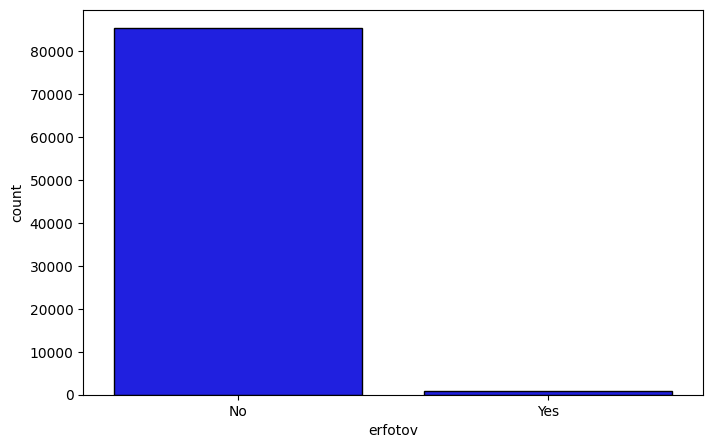

In [17]:
desbalanceo_med=b.Desbalanceo(encoded_med,"erfotov")
desbalanceo_med.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN TOMEKLINK**

-  Elimina pares de muestras cercanas entre la clase mayoritaria y la clase minoritaria donde el vecino más cercano de un punto de la clase minoritaria pertenece a la clase mayoritaria.

In [18]:
encoded_med.shape

(86216, 16)

In [19]:
balanced_tomek_med, tomek_medianas_1=desbalanceo_med.balancear_clases_tomek()

In [20]:
with open('../../../transformers/preprocesamiento/medianas/tomek_medianas_1.pkl', 'wb') as t:
    pickle.dump(tomek_medianas_1, t)

In [21]:
balanced_tomek_med.shape

(85927, 16)

In [22]:
balanced_tomek_med.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.159530,0.112949,0.345806,0.422752,0.032256,0.744549,0.058342,0.533333,0.46046,0.247934,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.067911,0.225956,0.345806,0.422752,0.529264,0.744549,0.058342,0.533333,0.46046,0.247934,0


In [23]:
round(balanced_tomek_med["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    99.11
1     0.89
Name: proportion, dtype: float64

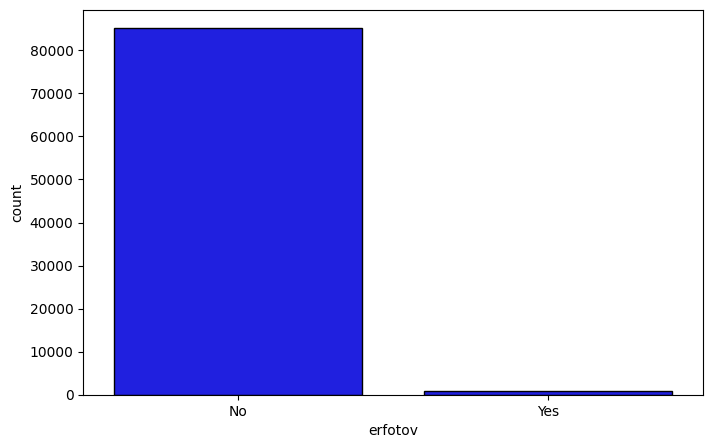

In [24]:
desbalanceo_med2=b.Desbalanceo(balanced_tomek_med,"erfotov")
desbalanceo_med2.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN SMOTENC PARA QUE NO TOQUE LAS CATEGORICAS**

In [25]:
columnas_son_cat_encoded_med=["calefac", "naseos", "metrosvi","annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "nplazasgar", "bonificaciones"]

In [26]:
balanced_tomek_med.shape

(85927, 16)

In [28]:
df_balanceado_smote_med, smotenc_medianas=desbalanceo_med2.balancear_clase_smotenc(columnas_son_cat_encoded_med, sampling_strategy=0.6)

In [29]:
with open('../../../transformers/preprocesamiento/medianas/smotenc_medianas.pkl', 'wb') as t:
    pickle.dump(smotenc_medianas, t)

In [30]:
df_balanceado_smote_med.head(3)

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.012886,0.229215,0.597905,0.579939,0.519706,0.159530,0.112949,0.345806,0.422752,0.032256,0.744549,0.058342,0.533333,0.46046,0.247934,0
1,0.012886,0.478067,0.597905,0.579939,0.327955,0.067911,0.225956,0.345806,0.422752,0.529264,0.744549,0.058342,0.533333,0.46046,0.247934,0
2,0.012886,0.478067,0.597905,0.301417,0.152338,0.129489,0.308133,0.654194,0.577248,0.071611,0.744549,0.058342,0.533333,0.46046,0.247934,0


In [31]:
round(df_balanceado_smote_med["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.5
1    37.5
Name: proportion, dtype: float64

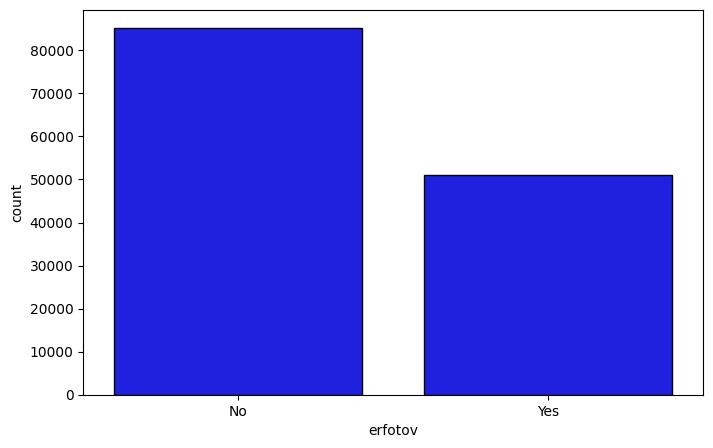

In [32]:
desbalanceo_med3=b.Desbalanceo(df_balanceado_smote_med,"erfotov")
desbalanceo_med3.visualizar_clase(color="blue", edgecolor="black")

revisar que valores unicos de Attrition se hayan mantenido

In [33]:
df_balanceado_smote_med["erfotov"].unique()

array([0, 1])

In [34]:
df_balanceado_smote_med.shape

(136264, 16)

In [35]:
balanced_tomek_med2, tomek_medianas_2=desbalanceo_med3.balancear_clases_tomek()

In [36]:
with open('../../../transformers/preprocesamiento/medianas/tomek_medianas_2.pkl', 'wb') as t:
    pickle.dump(tomek_medianas_2, t)

In [37]:
balanced_tomek_med2.shape

(136043, 16)

In [38]:
round(balanced_tomek_med2["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.44
1    37.56
Name: proportion, dtype: float64

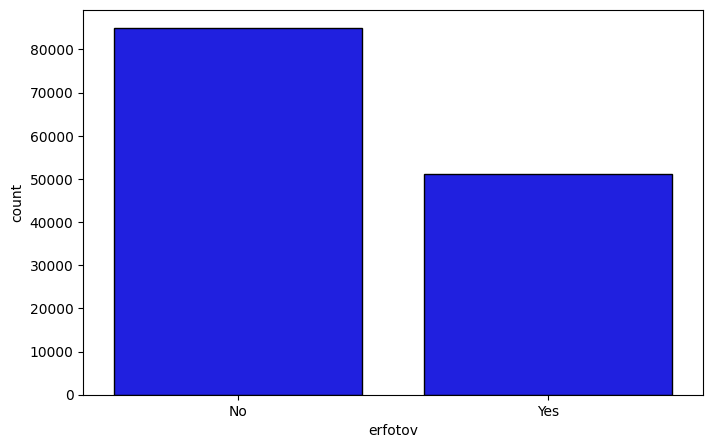

In [39]:
desbalanceo_med4=b.Desbalanceo(balanced_tomek_med2,"erfotov")
desbalanceo_med4.visualizar_clase(color="blue", edgecolor="black")

Uso el primer Tomek para reducir un poco la mayoritaria (No demasiado he de decir) y hacer los "márgenes más claros entre las clases. Luego uso el Smotenc que me hace un upsampling y finalmente uso un tomek de nuevo para volver a marcar bien las clases tras haber generado datos con el smotenc.

**OBSERVAMOS SI HAY ALTAS CORRELACIONES POR SI LAS TENEMOS QUE TRATAR**

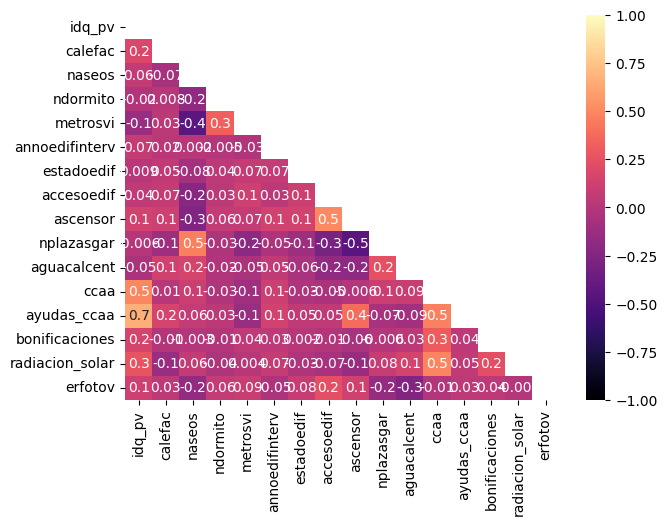

In [40]:
abcc=b.Visualizador(balanced_tomek_med2)
abcc.correlacion()

Tratamos las altas correlaciones:  
- Elimino garaje, horas de sol y tipoedif

### **Me guardo ya el conjunto de datos preprocesado** (habiendo guardado cada preprocesamiento (transformer) en un pickle)

In [41]:
balanced_tomek_med2.to_pickle("../../../datos/EF/Datos_modelos/Modelo_medianas/medianas_preprocesadas.pkl")